In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

In [4]:
def prepro(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    mask = np.zeros((gray.shape),np.uint8)
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))

    close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
    div = np.float32(gray)/(close)
    res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))
    res2 = cv2.cvtColor(res,cv2.COLOR_GRAY2BGR)
    plt.imshow(res)
    return res2, res, mask
    

In [105]:
m = cv2.imread("s1.jpeg")
ref = cv2.imread("blank-sudoku-grid.png")
ref_g = cv2.cvtColor(ref,cv2.COLOR_BGR2GRAY)

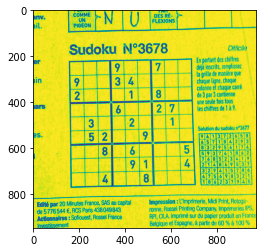

In [106]:
mo, mg, mask = prepro(m)

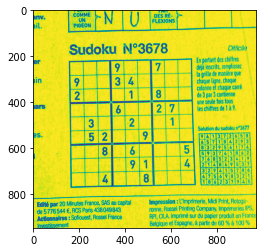

In [107]:
plt.imshow(mg)


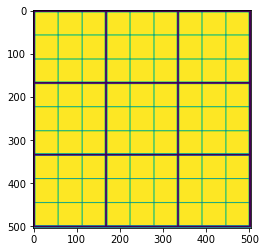

In [108]:
plt.imshow(ref_g)

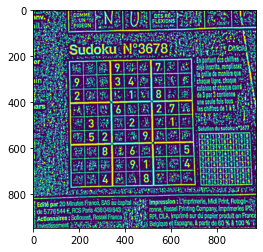

In [109]:
thresh = cv2.adaptiveThreshold(mg,255,0,1,19,2)
contour,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(thresh)
max_area = 0
best_cnt = None
for cnt in contour:
    area = cv2.contourArea(cnt)
    if area > 1000:
        if area > max_area:
            max_area = area
            best_cnt = cnt

t1 = cv2.drawContours(mask,[best_cnt],0,255,-1)

t2 = cv2.drawContours(mask,[best_cnt],0,0,2)


res = cv2.bitwise_and(mg,mask)

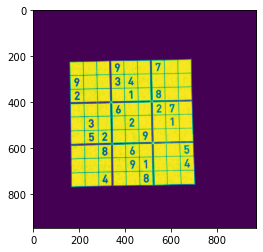

In [110]:
plt.imshow(res)

In [111]:
type(best_cnt)

numpy.ndarray

[689 208]
[689 209]
[688 210]
[682 210]
[681 211]
[658 211]
[657 212]
[656 211]
[655 211]
[654 212]
[629 212]
[628 213]
[614 213]
[613 212]
[612 213]
[597 213]
[596 214]
[595 213]
[593 213]
[592 214]
[589 214]
[588 213]
[584 213]
[583 214]
[550 214]
[549 215]
[548 214]
[540 214]
[539 215]
[529 215]
[528 214]
[521 214]
[520 215]
[502 215]
[501 214]
[500 215]
[497 215]
[496 214]
[491 214]
[490 215]
[485 215]
[484 214]
[483 215]
[461 215]
[460 216]
[458 216]
[457 215]
[453 215]
[452 216]
[425 216]
[424 217]
[413 217]
[412 216]
[411 216]
[410 215]
[409 215]
[407 217]
[406 217]
[405 216]
[403 216]
[402 217]
[390 217]
[389 216]
[388 216]
[387 217]
[379 217]
[378 216]
[377 216]
[376 217]
[346 217]
[345 218]
[305 218]
[304 219]
[300 219]
[299 218]
[298 219]
[296 219]
[295 218]
[294 218]
[293 219]
[274 219]
[273 220]
[272 220]
[271 219]
[270 219]
[269 220]
[267 220]
[266 219]
[265 219]
[264 220]
[261 220]
[260 219]
[259 220]
[231 220]
[230 221]
[229 220]
[228 220]
[227 221]
[184 221]
[183 222]


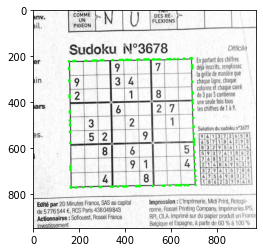

In [112]:
uwu = mo.copy()
for i in best_cnt:
    print(i[0])
    cv2.circle(uwu,(i[0][0], i[0][1]), 5, (0,255,0), -1)
    
plt.imshow(uwu)

(155, 223)
(706, 761)
(689, 208)
(165, 773)


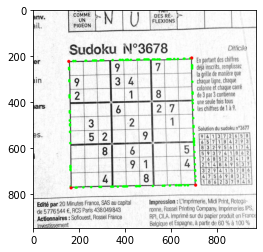

In [113]:
extLeft = tuple(best_cnt[best_cnt[:, :, 0].argmin()][0])
extRight = tuple(best_cnt[best_cnt[:, :, 0].argmax()][0])
extTop = tuple(best_cnt[best_cnt[:, :, 1].argmin()][0])
extBot = tuple(best_cnt[best_cnt[:, :, 1].argmax()][0])

ext = [extLeft,extRight,extTop,extBot]

for p in ext:
    
    print(p)
    cv2.circle(uwu,p, 7, (255,0,0), -1)
    
plt.imshow(uwu)

In [114]:
extLeft == extTop

False

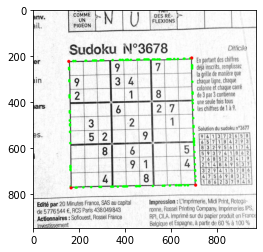

In [115]:
for k in best_cnt[best_cnt[:, :, 1] == 133]:
    print(k)
    cv2.circle(uwu,tuple(k), 7, (0,0,255), -1)
    
plt.imshow(uwu)
    
    


In [116]:
res.shape

(948, 973)

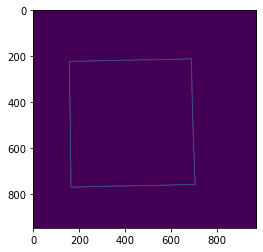

In [141]:
canny = cv2.Canny(mask, 120, 255, 1)
plt.imshow(canny)

In [142]:
corners = cv2.goodFeaturesToTrack(canny,4,0.5,50)

702.0 757.0
686.0 213.0
167.0 769.0
159.0 225.0


<ipython-input-143-1360510368e3>:4: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(uwu2,(x,y),5,(36,255,12),-1)
<ipython-input-143-1360510368e3>:5: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.putText(uwu2,'{},{}'.format(int(x),int(y)),(x,y),2,1,(255,0,0))


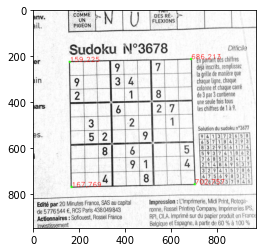

In [143]:
uwu2 = mo.copy()
for corner in corners:
    x,y = corner.ravel()
    cv2.circle(uwu2,(x,y),5,(36,255,12),-1)
    cv2.putText(uwu2,'{},{}'.format(int(x),int(y)),(x,y),2,1,(255,0,0))
    print(x,y)

plt.imshow(uwu2)

In [144]:
pA = corners[0][0]
pB = corners[1][0]
pC = corners[2][0]
pD = corners[3][0]


In [145]:
wAB = np.sqrt((pA[0]-pB[0])**2 + (pA[1]-pB[1])**2)
wDC = np.sqrt((pD[0]-pC[0])**2 + (pD[1]-pC[1])**2)
maxW = max(wAB,wDC)

hCA = np.sqrt((pC[0]-pA[0])**2 + (pC[1]-pA[1])**2)
hDB = np.sqrt((pD[0]-pB[0])**2 + (pD[1]-pB[1])**2)
maxH = max(hCA, hDB)

In [176]:
m.shape
mH = m.shape[0]
mW = m.shape[1]

In [147]:
maxW

544.2352432542384

In [295]:
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    dist_2 = (nodes - node)**2
    print(dist_2.reshape(4,2))
    n = np.sum(dist_2.astype("int"),axis=-1)

    return np.argmin(n)


In [296]:
corners

array([[[702., 757.]],

       [[686., 213.]],

       [[167., 769.]],

       [[159., 225.]]], dtype=float32)

In [297]:
H


252

In [300]:
pA = closest_node([0,0],corners)
pB = closest_node([0,mH-1],corners)
pC = closest_node([mW-1,mH-1],corners)
pD = closest_node([mW-1,0],corners)

[[492804. 573049.]
 [470596.  45369.]
 [ 27889. 591361.]
 [ 25281.  50625.]]
[[492804.  36100.]
 [470596. 538756.]
 [ 27889.  31684.]
 [ 25281. 521284.]]
[[ 72900.  36100.]
 [ 81796. 538756.]
 [648025.  31684.]
 [660969. 521284.]]
[[ 72900. 573049.]
 [ 81796.  45369.]
 [648025. 591361.]
 [660969.  50625.]]


In [301]:
pB


2

In [189]:
H = W = 252

In [153]:
output_pts = np.float32([[0, 0],
                        [0, H - 1],
                        [W - 1, H - 1],
                        [W - 1, 0]])



In [154]:
input_pts = np.float32([pA, pB, pC, pD])

ValueError: setting an array element with a sequence.

In [155]:
M = cv2.getPerspectiveTransform(input_pts,output_pts)

In [156]:
out = cv2.warpPerspective(mo,M,(W, H),flags=cv2.INTER_LINEAR)

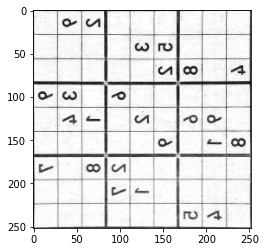

In [157]:
plt.imshow(out)